<a href="https://colab.research.google.com/github/Kwatcho/CVD_DL_Project/blob/main/K3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
file_path = 'heart_failure_clinical_records_dataset-1.csv' #https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
!pip install imblearn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load the dataset
file_path = 'heart_failure_clinical_records_dataset-1.csv'
df = pd.read_csv(file_path)

# Define numerical and categorical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Handle missing values for numerical features
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_features] = numerical_imputer.fit_transform(df[numerical_features])

# Normalize numerical features
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Handle missing values for categorical features and one-hot encode them
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])
df = pd.get_dummies(df, columns=categorical_features)

# Extract feature names
feature_names = df.drop(columns=['DEATH_EVENT']).columns.tolist()

# Convert boolean columns to integers (0 and 1)
for column in df.columns:
    if df[column].dtype == bool:
        df[column] = df[column].astype(int)

# Display the first few rows of the processed dataframe
df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,1,1,0,1,0,0,1,0,1,1,0
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,1,1,0,1,0,1,0,0,1,1,0
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,1,1,0,1,0,1,0,0,1,0,1
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,1,1,0,1,0,0,1,1,0
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1,0,1,0,1,1,0,1,0,1,0


In [4]:
# Define the target variable and convert it to categorical
y = df['DEATH_EVENT']
y = to_categorical(y)  # Convert to one-hot encoding

X = df.drop(columns=['DEATH_EVENT']).to_numpy()
X = X.reshape((X.shape[0],X.shape[1],1))
print(X.shape, y.shape)

(299, 17, 1) (299, 2)


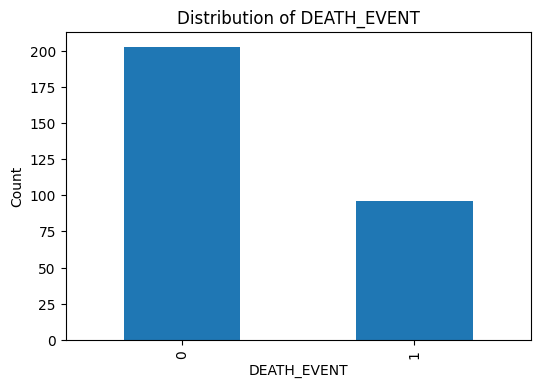

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the distribution of the target variable y before conversion
plt.figure(figsize=(6, 4))
df['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.show()

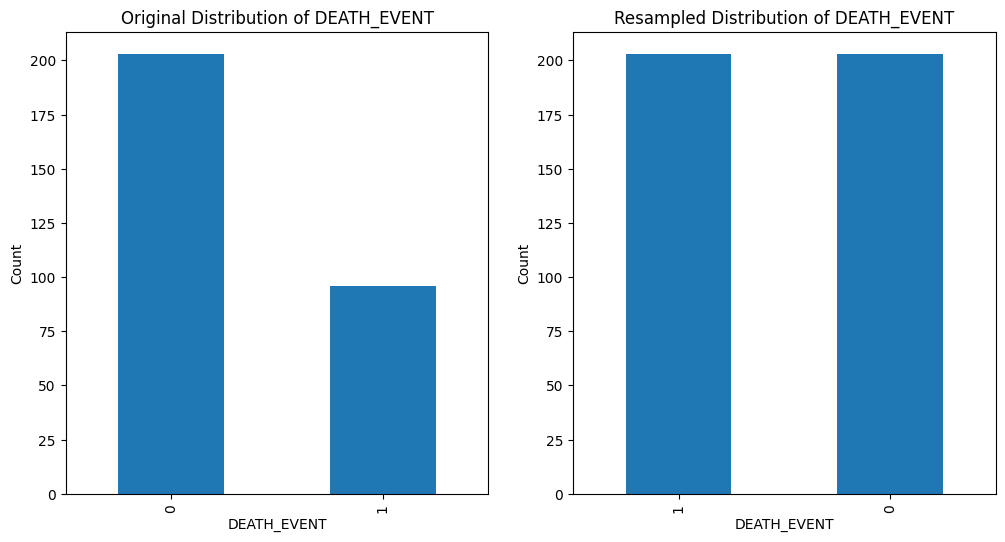

In [6]:
# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X.reshape(X.shape[0],X.shape[1]), y)

# Apply RandomOverSampler to increase the dataset size
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_smote, y_smote)

# Convert the resampled target variable to one-hot encoding
y_resampled = to_categorical(y_resampled)

# Plot the distribution of the original and resampled target variable
fig, ax = plt.subplots(1, 2, figsize=(12, 6))



df['DEATH_EVENT'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Original Distribution of DEATH_EVENT')
ax[0].set_xlabel('DEATH_EVENT')
ax[0].set_ylabel('Count')

pd.Series(y_resampled.argmax(axis=1)).value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Resampled Distribution of DEATH_EVENT')
ax[1].set_xlabel('DEATH_EVENT')
ax[1].set_ylabel('Count')

plt.show()

In [7]:
from sklearn.model_selection import train_test_split
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled.reshape(X_resampled.shape[0],X_resampled.shape[1],1), y_resampled, test_size=0.30, random_state=25)

In [8]:
import keras
from keras import layers
from keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization

# **DNN MODEL**

In [9]:
# load the model from JSON
from tensorflow.keras.models import Sequential, model_from_json

In [10]:
json_file = open('dnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
dnn_model = model_from_json(loaded_model_json)
# load weights into new model
dnn_model.load_weights("model-dnn.h5")
print("Loaded model from disk")

Loaded model from disk


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 17)                0         
                                                                 
 HiddenLayer1 (Dense)        (None, 784)               14112     
                                                                 
 batch_normalization_1 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 HiddenLayer2 (Dense)        (None, 260)               204100    
                                                                 
 batch_normalization_2 (Bat  (None, 260)               1040      
 chNormalization)                                     

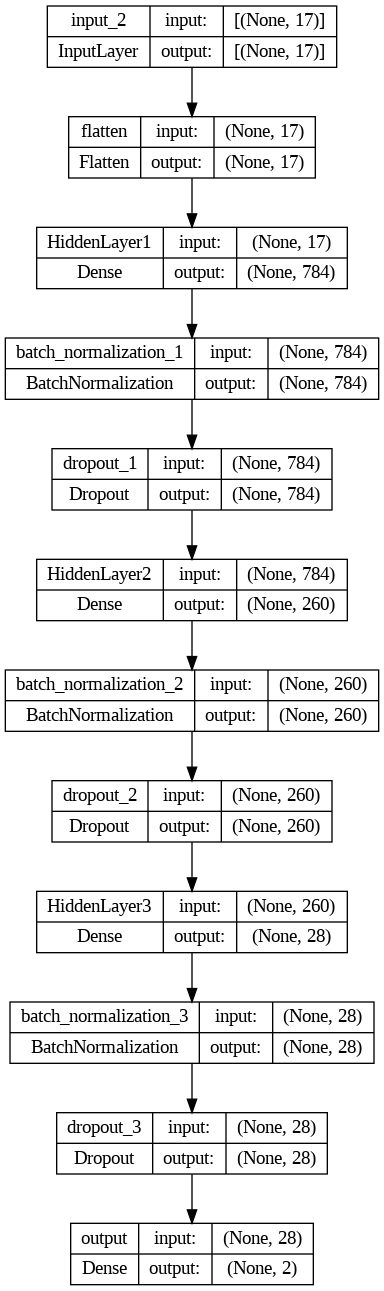

In [11]:
dnn_model.summary()
# Visualize the model architecture
plot_model(dnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
from tensorflow.keras.callbacks import LearningRateScheduler
batch_size = 16
epochs = 100

dnn_model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.004042791145062336), metrics=["accuracy"])
def lr_schedule(epoch):
    return 0.001 * np.power(0.9, epoch)

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = dnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.20,verbose=1,callbacks=[early_stopping,lr_scheduler])

Epoch 1/100
15/15 [==============================] - 4s 60ms/step - loss: 0.4516 - accuracy: 0.8106 - val_loss: 0.4175 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 2/100
15/15 [==============================] - 0s 15ms/step - loss: 0.3706 - accuracy: 0.8414 - val_loss: 0.4131 - val_accuracy: 0.8246 - lr: 9.0000e-04
Epoch 3/100
15/15 [==============================] - 0s 22ms/step - loss: 0.4803 - accuracy: 0.7797 - val_loss: 0.3402 - val_accuracy: 0.8596 - lr: 8.1000e-04
Epoch 4/100
15/15 [==============================] - 0s 19ms/step - loss: 0.2906 - accuracy: 0.8943 - val_loss: 0.3561 - val_accuracy: 0.8246 - lr: 7.2900e-04
Epoch 5/100
15/15 [==============================] - 0s 17ms/step - loss: 0.3259 - accuracy: 0.8458 - val_loss: 0.4124 - val_accuracy: 0.8246 - lr: 6.5610e-04
Epoch 6/100
15/15 [==============================] - 0s 16ms/step - loss: 0.3012 - accuracy: 0.8502 - val_loss: 0.4265 - val_accuracy: 0.7895 - lr: 5.9049e-04
Epoch 7/100
15/15 [==============================]

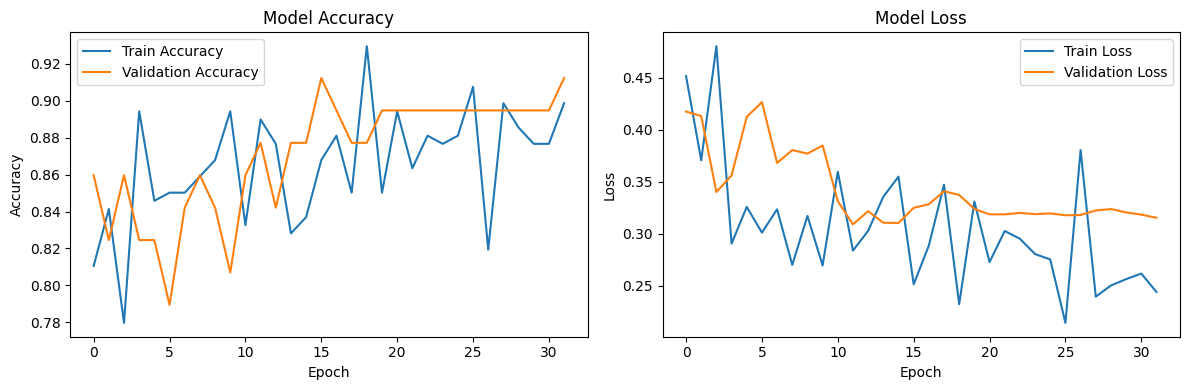

In [13]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable containing the history object returned by dnn_model.fit()
# and it has 'accuracy', 'val_accuracy', 'loss', and 'val_loss'

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


4/4 [==============================] - 0s 9ms/step


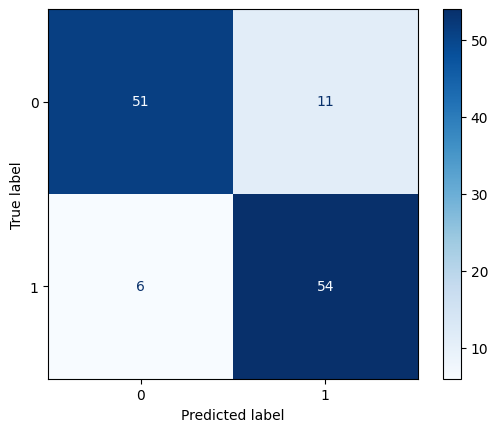

Accuracy: 0.8607


In [14]:
# Make predictions
y_pred = dnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to single-label format

# Assuming y_test is also in multilabel-indicator format
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test_classes, y_pred_classes)  # Use single-label data
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# **Hyper Parameter Tuning for DNN**

In [15]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [16]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential()

    # Input layer
    model.add(keras.Input(shape=(X_resampled.shape[1],)))

    # Hidden Layer 1
    model.add(layers.Dense(
        units=hp.Int('units_hidden_1', min_value=400, max_value=1000, step=64),
        activation='relu',
        name='HiddenLayer1'
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    # Hidden Layer 2
    model.add(layers.Dense(
        units=hp.Int('units_hidden_2', min_value=100, max_value=300, step=32),
        activation='relu',
        name='HiddenLayer2'
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    # Hidden Layer 3
    model.add(layers.Dense(
        units=hp.Int('units_hidden_3', min_value=20, max_value=50, step=8),
        activation='relu',
        name='HiddenLayer3'
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    # Output Layer
    model.add(layers.Dense(2, activation='softmax', name='output'))

    # Define the optimizer learning rate as a hyperparameter
    learning_rate = hp.Float('lr', min_value=1e-3, max_value=1e-2, sampling='log')

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [17]:
build_model(kt.HyperParameters())

#initialize the tuner
tuner = kt.RandomSearch(
    hypermodel= build_model,
    objective="val_accuracy",
    overwrite = True,# Do not resume the previous search in the same directory.
    max_trials= 100,
    directory = "models/param_tuning",  # Set a directory to store the intermediate results.
    project_name= "param_tuning"
)

In [18]:
import tensorflow as tf
#Visuallizing the hyperparameter tuning process
tuner.search(X_train, y_train,
        validation_split=0.20,
        batch_size = 32,
        epochs = 100,
        # Use the TensorBoard callback.
        # The logs will be write to "models/tb_logs".
        callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=10,verbose=1,mode="min"),lr_scheduler]
          #tf.keras.callbacks.TensorBoard("models/tb_logs")],
             )

Trial 2 Complete [00h 00m 25s]
val_accuracy: 0.5964912176132202

Best val_accuracy So Far: 0.7719298005104065
Total elapsed time: 00h 00m 53s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
592               |464               |units_hidden_1
164               |228               |units_hidden_2
20                |20                |units_hidden_3
0.0014796         |0.0031419         |lr

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
tuner.results_summary()

In [ ]:
best_model = tuner.get_best_models()[0]
best_model.save_weights('best_CVD_pred_model.h5')
best_model.save('best_CVD_pred_model.h5')

In [ ]:
# Make predictions
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to single-label format

# Assuming y_test is also in multilabel-indicator format
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test_classes, y_pred_classes)  # Use single-label data
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# **CNN Model**


In [19]:
json_file = open('cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn_model = model_from_json(loaded_model_json)
# load weights into new model
cnn_model.load_weights("model-cnn.h5")
print("Loaded model from disk")

Loaded model from disk


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 7, 90)             450       
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 90)             32490     
                                                                 
 flatten_1 (Flatten)         (None, 180)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 912)               165072    
                                                                 
 batch_normalization_3 (Bat  (None, 912)               3648      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 912)               0         
                                                      

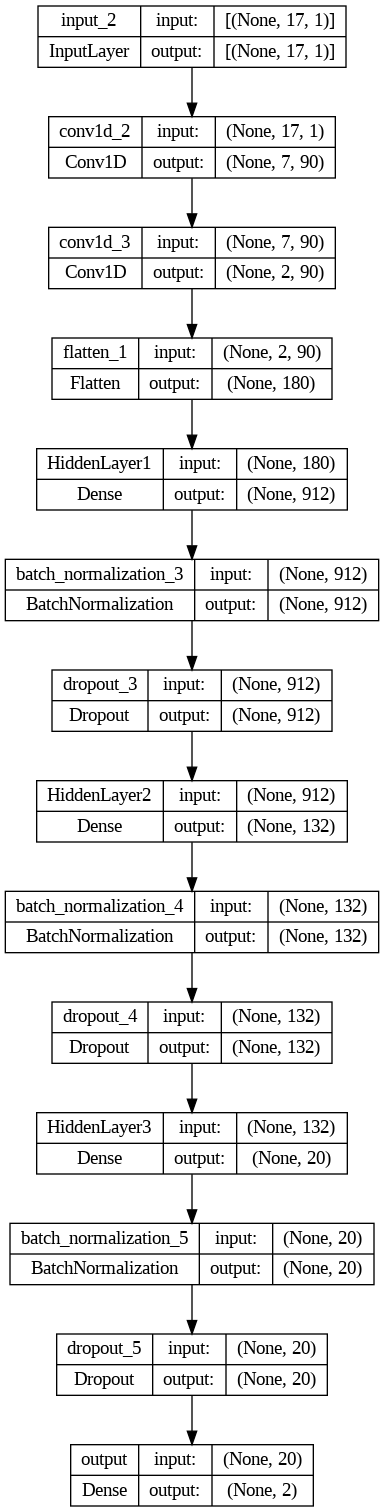

In [20]:
cnn_model.summary()
# Visualize the model architecture
plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
from tensorflow.keras.callbacks import LearningRateScheduler
batch_size = 16
epochs = 100

cnn_model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.004042791145062336), metrics=["accuracy"])
def lr_schedule(epoch):
    return 0.001 * np.power(0.9, epoch)

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.20,verbose=1,callbacks=[early_stopping,lr_scheduler])

Epoch 1/100
15/15 [==============================] - 3s 33ms/step - loss: 0.4100 - accuracy: 0.8458 - val_loss: 0.4202 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 2/100
15/15 [==============================] - 0s 12ms/step - loss: 0.3228 - accuracy: 0.8678 - val_loss: 0.3907 - val_accuracy: 0.8246 - lr: 9.0000e-04
Epoch 3/100
15/15 [==============================] - 0s 10ms/step - loss: 0.3754 - accuracy: 0.8458 - val_loss: 0.4183 - val_accuracy: 0.8246 - lr: 8.1000e-04
Epoch 4/100
15/15 [==============================] - 0s 12ms/step - loss: 0.2955 - accuracy: 0.8767 - val_loss: 0.3854 - val_accuracy: 0.8246 - lr: 7.2900e-04
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 0.3769 - accuracy: 0.8238 - val_loss: 0.3872 - val_accuracy: 0.8421 - lr: 6.5610e-04
Epoch 6/100
15/15 [==============================] - 0s 12ms/step - loss: 0.2755 - accuracy: 0.8634 - val_loss: 0.4313 - val_accuracy: 0.8246 - lr: 5.9049e-04
Epoch 7/100
15/15 [==============================]

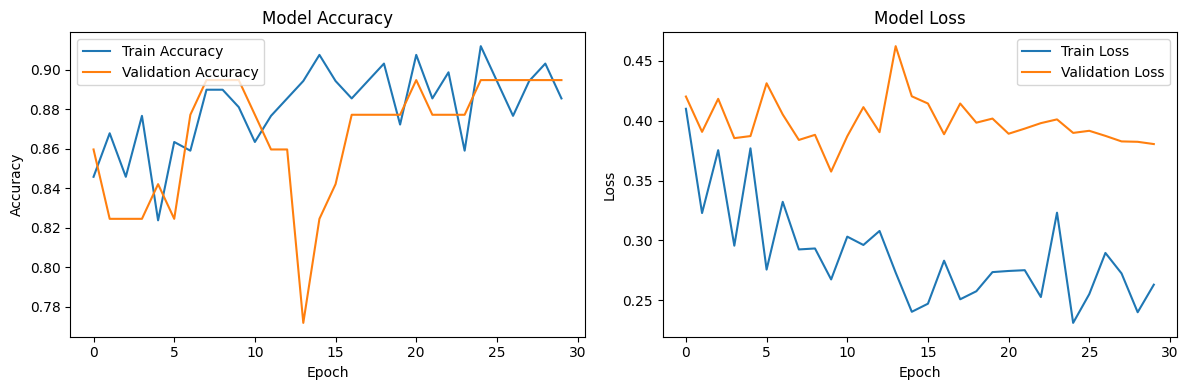

In [22]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable containing the history object returned by model.fit()
# and it has 'accuracy', 'val_accuracy', 'loss', and 'val_loss'

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 5ms/step


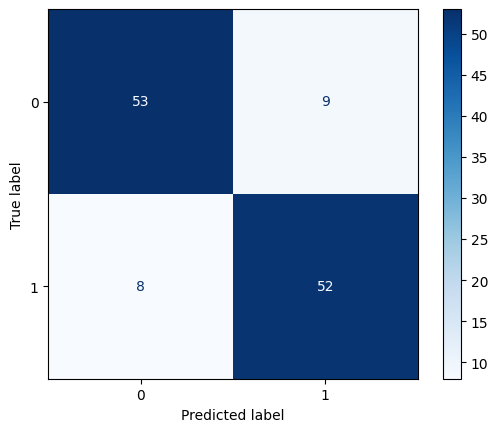

Accuracy: 0.8607


In [23]:
# Make predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to single-label format

# Assuming y_test is also in multilabel-indicator format
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test_classes, y_pred_classes)  # Use single-label data
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# **Hyper Parameter Tuning for CNN**

In [26]:
def build_model(hp):
    model = keras.Sequential()

    # Input layer
    model.add(keras.Input(shape=(X_resampled.shape[1],1)))



    #Hyperparameters
    filter = hp.Int('filters', min_value=50, max_value=150, step=16)
    kernel_size = 4
    strides = hp.Int('units_strides_1', min_value = 1, max_value = 3, step = 1)



    #convolutional Layers
    model.add(layers.Conv1D(filters = filter , kernel_size = kernel_size, strides = strides , padding='valid', activation = 'relu'))

    model.add(layers.Conv1D(filters = filter , kernel_size = kernel_size, strides = strides, padding='valid', activation = 'relu'))

    model.add(layers.Flatten())

    # Hidden Layer 1
    model.add(layers.Dense(
        units=hp.Int('units_hidden_1', min_value=500, max_value=1000, step=10),
        activation='relu',
        name='HiddenLayer1'
    ))

    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    # Hidden Layer 2
    model.add(layers.Dense(
        units=hp.Int('units_hidden_2', min_value=100, max_value=400, step=10),
        activation='relu',
        name='HiddenLayer2'
    ))

    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    # Hidden Layer 3
    model.add(layers.Dense(
        units=hp.Int('units_hidden_3', min_value=10, max_value=80, step=5),
        activation='relu',
        name='HiddenLayer3'
    ))

    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    # Output Layer
    model.add(layers.Dense(2, activation='softmax', name='output'))

    # Define the optimizer learning rate as a hyperparameter
    learning_rate = hp.Float('lr', min_value=1e-3, max_value=1e-2, sampling='log')

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [27]:
build_model(kt.HyperParameters())

#initialize the tuner
tuner = kt.RandomSearch(
    hypermodel= build_model,
    objective="val_accuracy",
    overwrite = True,# Do not resume the previous search in the same directory.
    max_trials= 100,
    directory = "models/param_tuning",  # Set a directory to store the intermediate results.
    project_name= "param_tuning"
)

In [28]:
import tensorflow as tf
#Visuallizing the hyperparameter tuning process
tuner.search(X_train, y_train,
        validation_split=0.20,
        batch_size = 32,
        epochs = 100,
        # Use the TensorBoard callback.
        # The logs will be write to "models/tb_logs".
        callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=10,verbose=1,mode="min"),lr_scheduler]
          #tf.keras.callbacks.TensorBoard("models/tb_logs")],
             )

Trial 56 Complete [00h 00m 19s]
val_accuracy: 0.8245614171028137

Best val_accuracy So Far: 0.8947368264198303
Total elapsed time: 00h 15m 36s

Search: Running Trial #57

Value             |Best Value So Far |Hyperparameter
114               |66                |filters
1                 |2                 |units_strides_1
640               |750               |units_hidden_1
160               |280               |units_hidden_2
80                |45                |units_hidden_3
0.0052617         |0.001955          |lr



Exception ignored in: <function _xla_gc_callback at 0x7e9e7994fc70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Epoch 1/100
8/8 [==============================] - 7s 235ms/step - loss: 0.8785 - accuracy: 0.5727 - val_loss: 0.6773 - val_accuracy: 0.5965 - lr: 0.0010
Epoch 2/100
8/8 [==============================] - 1s 66ms/step - loss: 0.6419 - accuracy: 0.7048 - val_loss: 0.6647 - val_accuracy: 0.5965 - lr: 9.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 53ms/step - loss: 0.5988 - accuracy: 0.7181 - val_loss: 0.6576 - val_accuracy: 0.5965 - lr: 8.1000e-04
Epoch 4/100
8/8 [==============================] - 1s 115ms/step - loss: 0.5300 - accuracy: 0.7489 - val_loss: 0.6533 - val_accuracy: 0.5965 - lr: 7.2900e-04
Epoch 5/100
8/8 [==============================] - 1s 62ms/step - loss: 0.5367 - accuracy: 0.7489 - val_loss: 0.6533 - val_accuracy: 0.5965 - lr: 6.5610e-04
Epoch 6/100
8/8 [==============================] - 0s 45ms/step - loss: 0.5201 - accuracy: 0.7313 - val_loss: 0.6544 - val_accuracy: 0.5965 - lr: 5.9049e-04
Epoch 7/100
8/8 [==============================] - 0s 40ms/s

KeyboardInterrupt: 

# **Explainable AI for DNN (SHAP)**

In [29]:
# Use SHAP to explain the AI
!pip install shap
import shap
import xgboost

# print the JS visualization code to the notebook
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.6 MB/s eta 0:00:00


In [30]:
# Replace with the name of your Jupyter notebook
!jupyter trust K3.ipynb

[TrustNotebookApp] ERROR | Notebook missing: K3.ipynb
[TrustNotebookApp] Exiting application: jupyter


Kernel Explainer for the DNN

In [31]:
# Define background data (subset of training data)
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
background = background.reshape(background.shape[0],background.shape[1])

explainer = shap.KernelExplainer(dnn_model.predict, background)

4/4 [==============================] - 1s 5ms/step


In [32]:
# # Calculate SHAP values for the entire test dataset
# # Commented out because it takes too long to run
# ke_shap_values_all = explainer(X_test)

Deep Explainer for the DNN

In [33]:
# Define background data (subset of training data)
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
background = background.reshape(background.shape[0], background.shape[1])

# Instantiate the DeepExplainer with the model and background data
explainer_dnn = shap.DeepExplainer(dnn_model, background)


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [34]:
# Reshape test data correctly
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Calculate SHAP values for the entire test dataset
shap_values_dnn = explainer_dnn(X_test_reshape)


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [35]:
print("Shape of SHAP values:", shap_values_dnn.shape)

Shape of SHAP values: (122, 17, 2)


In [36]:
shap_values_dnn.feature_names = feature_names

# **Beeswarm Plot**

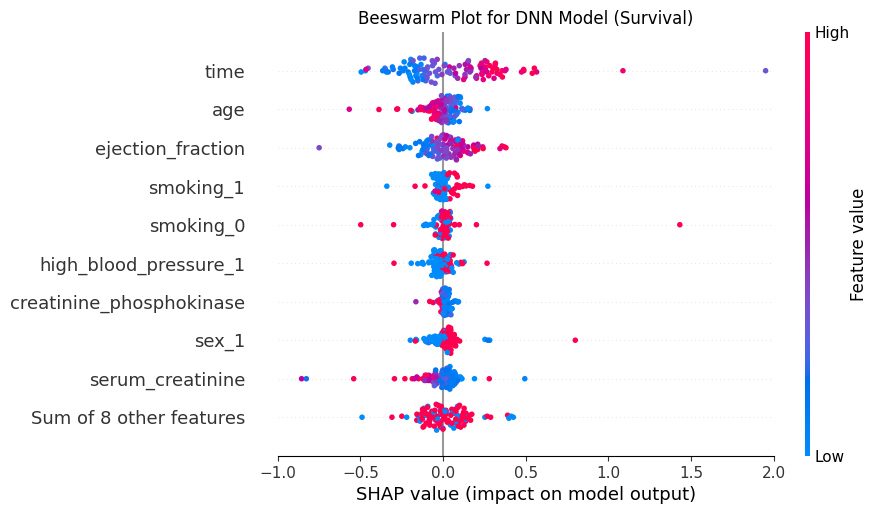

In [37]:
# Plot the beeswarm plot
plt.xlim(-1, 2)  # Rescale x-axis
plt.title('Beeswarm Plot for DNN Model (Survival)')
shap.plots.beeswarm(shap_values_dnn[:, :, 0])


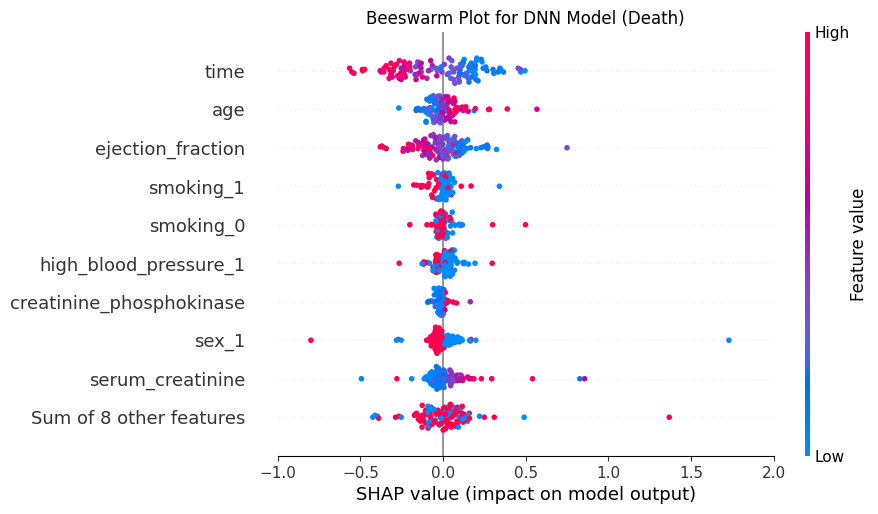

In [38]:
# Plot the beeswarm plot
plt.xlim(-1, 2)  # Rescale x-axis
plt.title('Beeswarm Plot for DNN Model (Death)')
shap.plots.beeswarm(shap_values_dnn[:, :, 1])

# **Scatter Plot**

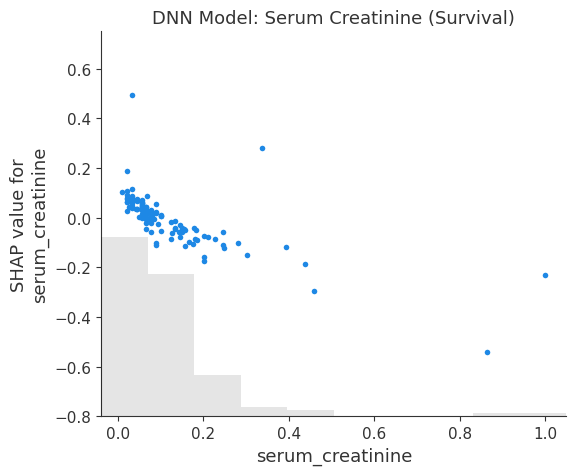

In [40]:
shap.plots.scatter(shap_values_dnn[:, "serum_creatinine", 0], title= 'DNN Model: Serum Creatinine (Survival)', ymin=-.8, ymax=.75)

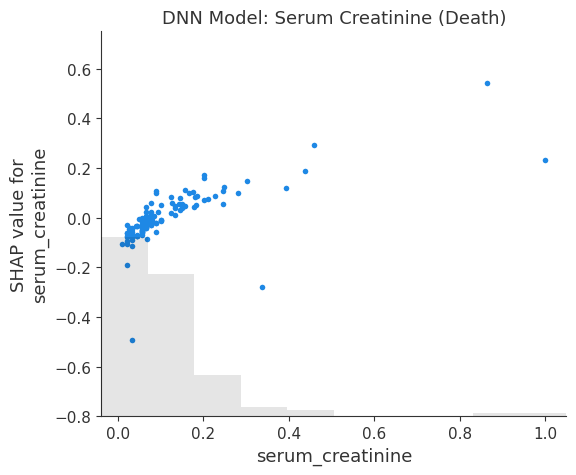

In [41]:
shap.plots.scatter(shap_values_dnn[:, "serum_creatinine", 1], title= 'DNN Model: Serum Creatinine (Death)', ymin=-.8, ymax=.75)

# **Explainable AI for CNN (SHAP)**

Deep Explainer for CNN

In [42]:
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
explainer_cnn = shap.DeepExplainer(cnn_model, background)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [43]:
shap_values_cnn = explainer_cnn(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [44]:
shap_values_cnn.shape

(122, 17, 1, 2)

In [45]:
#shap_values_cnn.values = np.squeeze(shap_values_cnn.values, axis=2)

In [46]:
shap_values_cnn.feature_names = feature_names

# **Beeswarm Plot**

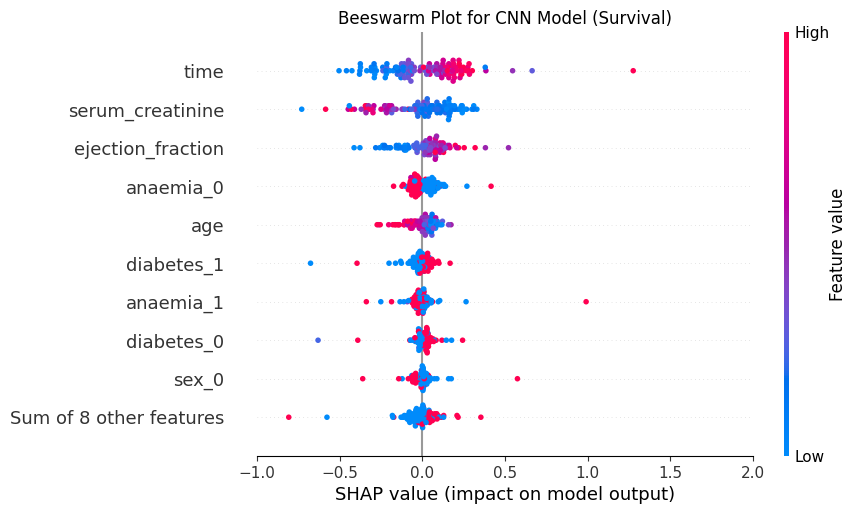

In [47]:
# Plot the beeswarm plot
plt.xlim(-1, 2)  # Rescale x-axis
plt.title('Beeswarm Plot for CNN Model (Survival)')
shap.plots.beeswarm(shap_values_cnn[:, :, 0, 0])

# **Scatter Plot**

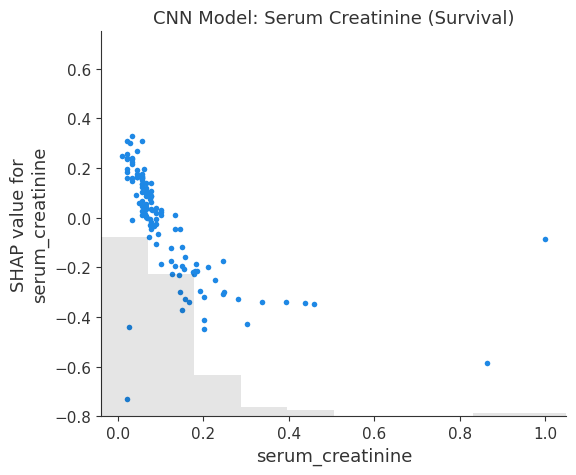

In [53]:
shap.plots.scatter(shap_values_cnn[:, "serum_creatinine", 0, 0], title= 'CNN Model: Serum Creatinine (Survival)', ymin=-.8, ymax=.75)

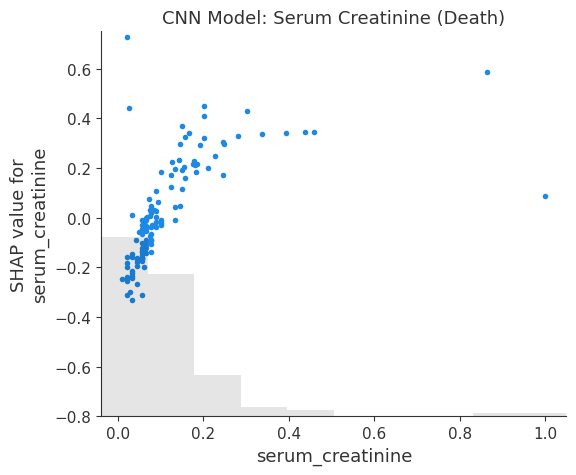

In [49]:
shap.plots.scatter(shap_values_cnn[:, "serum_creatinine", 0, 1], title= 'CNN Model: Serum Creatinine (Death)', ymin=-.8, ymax=.75)